In [1]:
# for data manipulation
import pandas as pd
import numpy as np
import math

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# for regression 
import statsmodels.api as sm

# for preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [2]:
rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
mgt = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

In [46]:
#load dataset
df = pd.read_csv('C:\\Users\\alexr\\Desktop\\   \\Work\\Data Science\\In Use\\House prices\\test.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [39]:
cat = [feature for feature in df.columns if len(df[feature].unique())<25]

#cat_df = pd.DataFrame(cat)

cat_df = df[cat]

In [78]:
num = [feature for feature in df.columns if len(df[feature].unique())>25]

#cat_df = pd.DataFrame(cat)

num_df = df[num]

In [41]:
cat_df.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,...,PavedDrive,3SsnPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Feedr,...,Y,0,0,NaN,MnPrv,NaN,6,2010,WD,Normal
1,20,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,...,Y,0,0,NaN,NaN,Gar2,6,2010,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,...,Y,0,0,NaN,MnPrv,NaN,3,2010,WD,Normal
3,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,...,Y,0,0,NaN,NaN,NaN,6,2010,WD,Normal
4,120,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Norm,...,Y,0,0,NaN,NaN,NaN,1,2010,WD,Normal


In [84]:
num_df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal
0,80.0,11622,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,896,1961.0,730.0,140,0,0,120,0
1,81.0,14267,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,1329,1958.0,312.0,393,36,0,0,12500
2,74.0,13830,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,1629,1997.0,482.0,212,34,0,0,0
3,78.0,9978,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,1604,1998.0,470.0,360,36,0,0,0
4,43.0,5005,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,1280,1992.0,506.0,0,82,0,144,0


In [83]:
num_df.drop(['Id'], axis=1, inplace=True)

C:\Users\alexr\AppData\Local\Temp\ipykernel_31364\991926524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df.drop(['Id'], axis=1, inplace=True)


In [36]:
for feature in cat:
    print('{} = {} cat'.format(feature,len(df[feature].unique())))

MSSubClass = 16 cat
MSZoning = 6 cat
Street = 2 cat
Alley = 3 cat
LotShape = 4 cat
LandContour = 4 cat
Utilities = 2 cat
LotConfig = 5 cat
LandSlope = 3 cat
Condition1 = 9 cat
Condition2 = 5 cat
BldgType = 5 cat
HouseStyle = 7 cat
OverallQual = 10 cat
OverallCond = 9 cat
RoofStyle = 6 cat
RoofMatl = 4 cat
Exterior1st = 14 cat
Exterior2nd = 16 cat
MasVnrType = 4 cat
ExterQual = 4 cat
ExterCond = 5 cat
Foundation = 6 cat
BsmtQual = 5 cat
BsmtCond = 5 cat
BsmtExposure = 5 cat
BsmtFinType1 = 7 cat
BsmtFinType2 = 7 cat
Heating = 4 cat
HeatingQC = 5 cat
CentralAir = 2 cat
Electrical = 4 cat
LowQualFinSF = 15 cat
BsmtFullBath = 5 cat
BsmtHalfBath = 4 cat
FullBath = 5 cat
HalfBath = 3 cat
BedroomAbvGr = 7 cat
KitchenAbvGr = 3 cat
KitchenQual = 5 cat
TotRmsAbvGrd = 12 cat
Functional = 8 cat
Fireplaces = 5 cat
FireplaceQu = 6 cat
GarageType = 7 cat
GarageFinish = 4 cat
GarageCars = 7 cat
GarageQual = 5 cat
GarageCond = 6 cat
PavedDrive = 3 cat
3SsnPorch = 13 cat
PoolArea = 7 cat
PoolQC = 3 cat
F

In [44]:
#check categorical value
for i in cat_df.columns:
    print(i.upper(),":",cat_df[i].unique())

MSSUBCLASS : [ 20  60 120 160  80  30  50  90  85 190  45  70  75 180  40 150]
MSZONING : ['RH' 'RL' 'RM' 'FV' 'C (all)' nan]
STREET : ['Pave' 'Grvl']
ALLEY : [nan 'Pave' 'Grvl']
LOTSHAPE : ['Reg' 'IR1' 'IR2' 'IR3']
LANDCONTOUR : ['Lvl' 'HLS' 'Bnk' 'Low']
UTILITIES : ['AllPub' nan]
LOTCONFIG : ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']
LANDSLOPE : ['Gtl' 'Mod' 'Sev']
CONDITION1 : ['Feedr' 'Norm' 'PosN' 'RRNe' 'Artery' 'RRNn' 'PosA' 'RRAn' 'RRAe']
CONDITION2 : ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery']
BLDGTYPE : ['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']
HOUSESTYLE : ['1Story' '2Story' 'SLvl' '1.5Fin' 'SFoyer' '2.5Unf' '1.5Unf']
OVERALLQUAL : [ 5  6  8  7  4  9  2  3 10  1]
OVERALLCOND : [6 5 7 8 2 9 3 4 1]
ROOFSTYLE : ['Gable' 'Hip' 'Gambrel' 'Flat' 'Mansard' 'Shed']
ROOFMATL : ['CompShg' 'Tar&Grv' 'WdShake' 'WdShngl']
EXTERIOR1ST : ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' nan 'CBlock']
EXTERIOR2ND : ['VinylS

In [7]:
df.describe().T\
        .style.bar(subset=['mean'], color=px.colors.qualitative.G10[5])\
        .background_gradient(subset=['std'], cmap='Blues')\
        .background_gradient(subset=['75%'], cmap='BuGn')

,count,mean,std,min,25%,50%,75%,max
Id,1459.000000,2190.000000,421.321334,1461.000000,1825.500000,2190.000000,2554.500000,2919.000000
MSSubClass,1459.000000,57.378341,42.746880,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1232.000000,68.580357,22.376841,21.000000,58.000000,67.000000,80.000000,200.000000
LotArea,1459.000000,9819.161069,4955.517327,1470.000000,7391.000000,9399.000000,11517.500000,56600.000000
OverallQual,1459.000000,6.078821,1.436812,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1459.000000,5.553804,1.113740,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1459.000000,1971.357779,30.390071,1879.000000,1953.000000,1973.000000,2001.000000,2010.000000
YearRemodAdd,1459.000000,1983.662783,21.130467,1950.000000,1963.000000,1992.000000,2004.000000,2010.000000
MasVnrArea,1444.000000,100.709141,177.625900,0.000000,0.000000,0.000000,164.000000,1290.000000
BsmtFinSF1,1458.000000,439.203704,455.268042,0.000000,0.000000,350.500000,753.500000,4010.000000


In [24]:
#Identifying missing categorical values
df[cat_df].isnull().sum()

MSSubClass          0
MSZoning            4
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
LowQualFinSF        0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageFini

In [28]:
#Missing values
# Calculate the percentage of missing values in each column
a = df.isnull().sum().sort_values(ascending=False) * 100 / len(df)

# Iterate over each column and its corresponding missing value percentage
for col, percentage in a.items():

    # Print the column name and its missing value percentage with 2 decimal places
    # '<30' in the f-string format specifies left alignment with a field width of 30 characters for the column names.
    print(f'{col:<30} {percentage:.2f}%')

PoolQC                         99.79%
MiscFeature                    96.50%
Alley                          92.67%
Fence                          80.12%
MasVnrType                     61.27%
FireplaceQu                    50.03%
LotFrontage                    15.56%
GarageYrBlt                    5.35%
GarageCond                     5.35%
GarageFinish                   5.35%
GarageQual                     5.35%
GarageType                     5.21%
BsmtCond                       3.08%
BsmtQual                       3.02%
BsmtExposure                   3.02%
BsmtFinType1                   2.88%
BsmtFinType2                   2.88%
MasVnrArea                     1.03%
MSZoning                       0.27%
BsmtHalfBath                   0.14%
Utilities                      0.14%
Functional                     0.14%
BsmtFullBath                   0.14%
BsmtFinSF1                     0.07%
Exterior1st                    0.07%
TotalBsmtSF                    0.07%
BsmtUnfSF                      

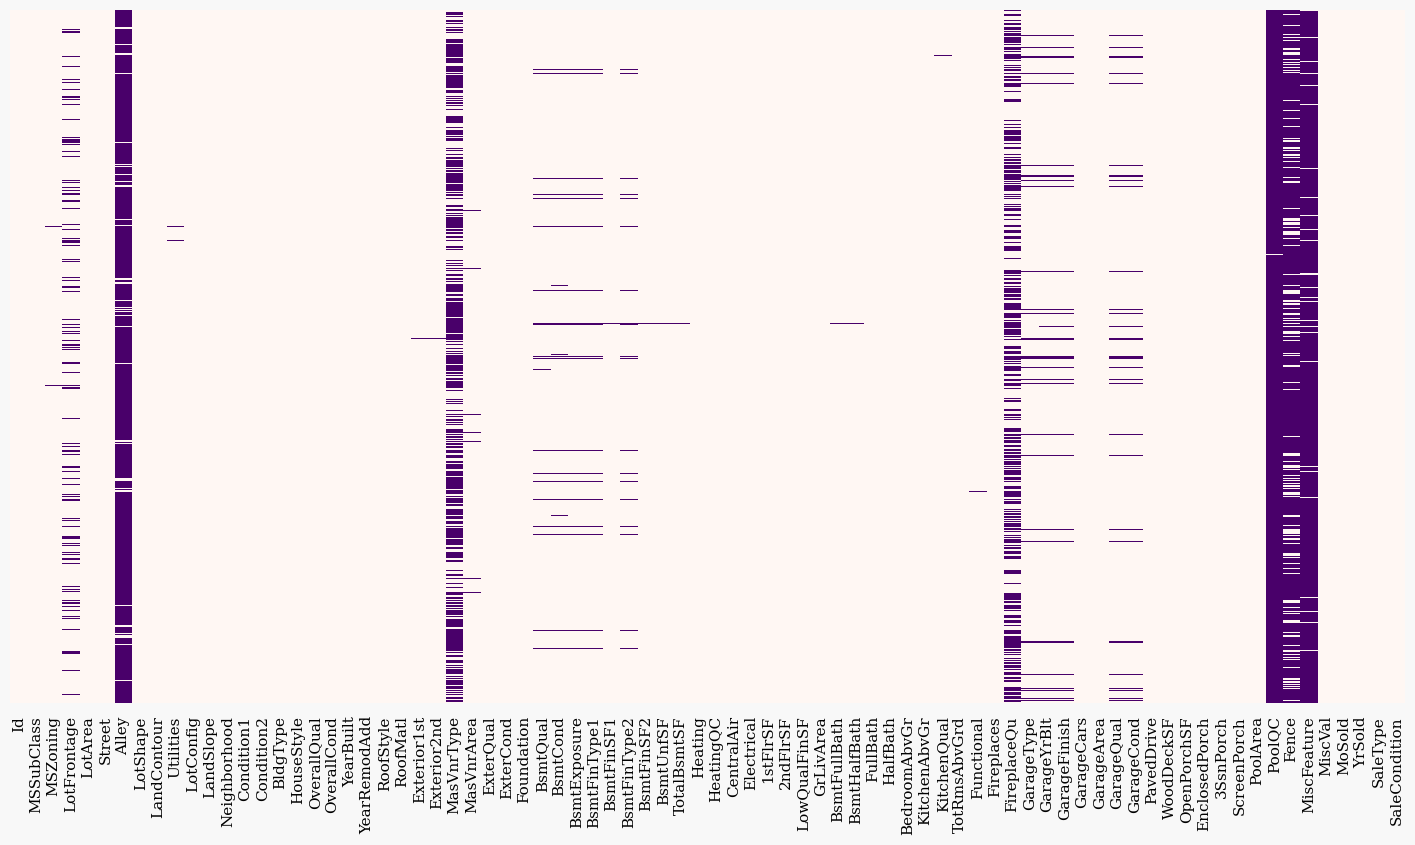

In [9]:
#Heatmap for missing values
# Visualize the missing values
plt.figure(figsize=(18, 9))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='RdPu')
plt.show()

In [66]:
rev_df = df

In [67]:
rev_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [76]:
rev_df = df.fillna('none')
rev_cat_df = cat_df.fillna('none')

In [77]:
rev_df.head()
rev_cat_df.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,...,PavedDrive,3SsnPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,Feedr,...,Y,0,0,none,MnPrv,none,6,2010,WD,Normal
1,20,RL,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Norm,...,Y,0,0,none,none,Gar2,6,2010,WD,Normal
2,60,RL,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,Norm,...,Y,0,0,none,MnPrv,none,3,2010,WD,Normal
3,60,RL,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,Norm,...,Y,0,0,none,none,none,6,2010,WD,Normal
4,120,RL,Pave,none,IR1,HLS,AllPub,Inside,Gtl,Norm,...,Y,0,0,none,none,none,1,2010,WD,Normal


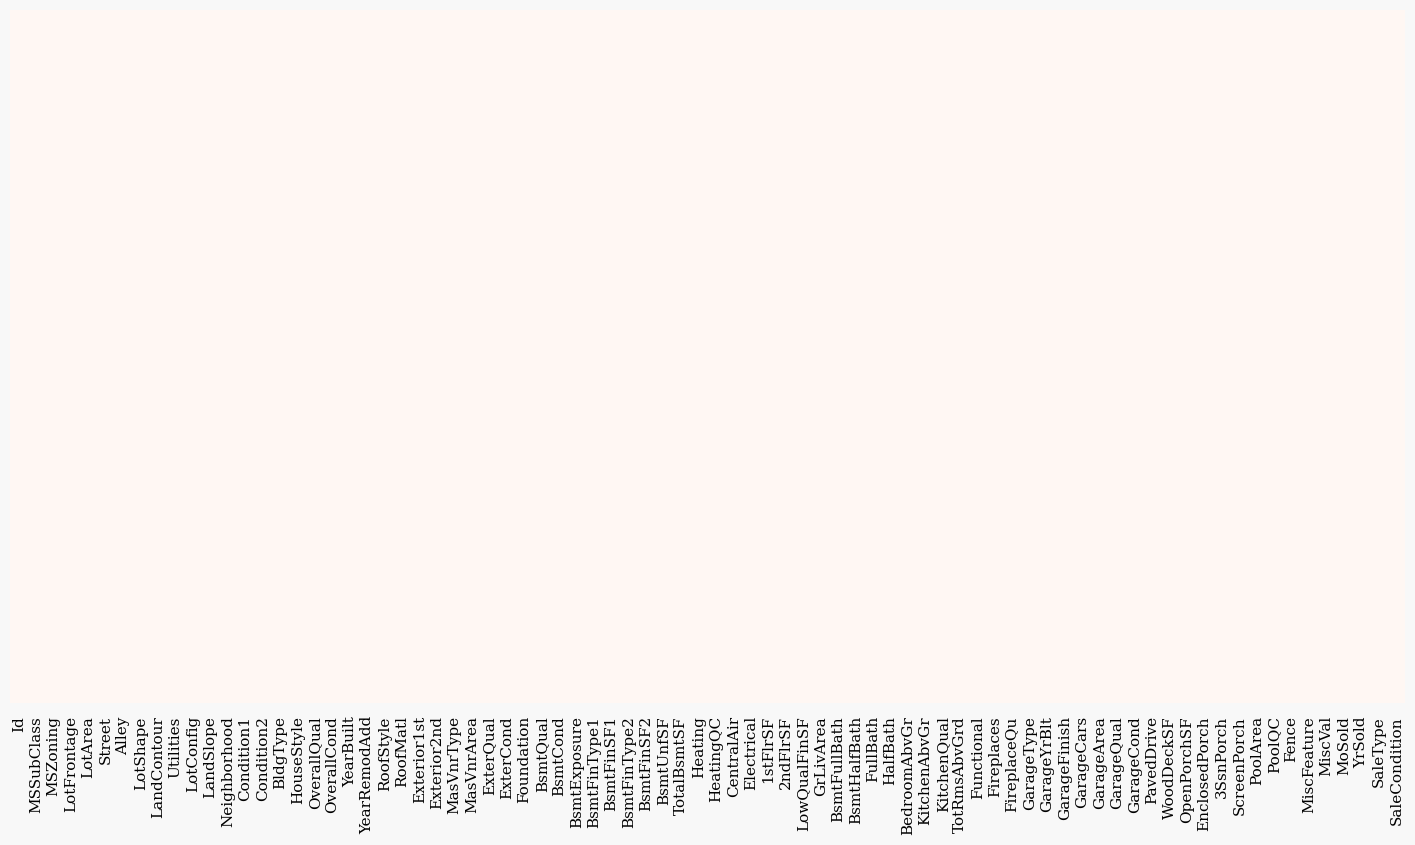

In [72]:
#Heatmap for missing values
# Visualize the missing values
plt.figure(figsize=(18, 9))
sns.heatmap(rev_df.isnull(), yticklabels=False, cbar=False, cmap='RdPu')
plt.show()

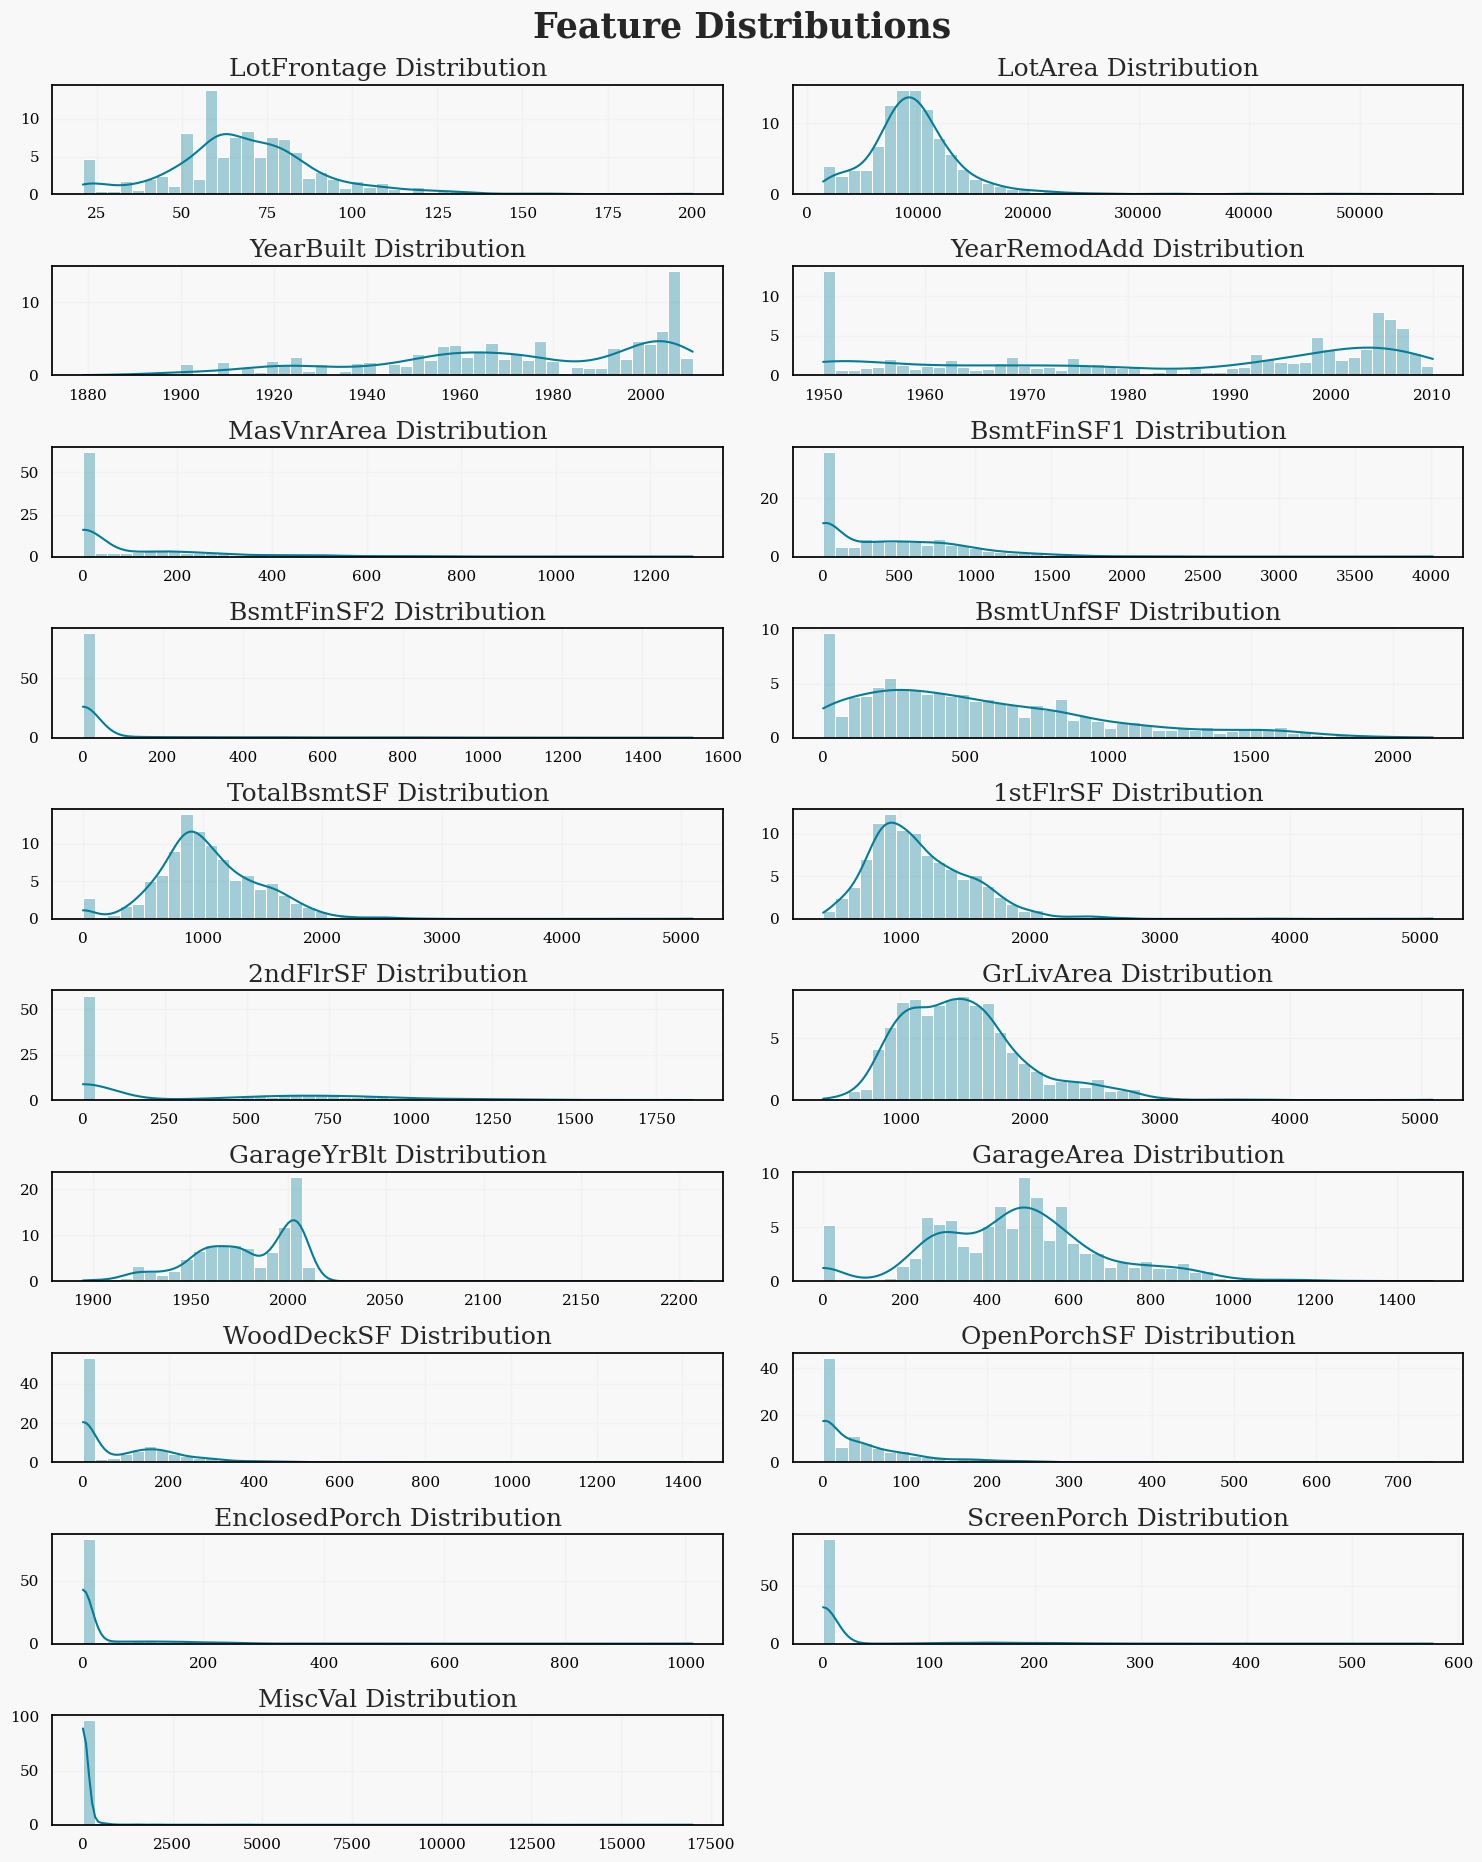

In [86]:
features = [f for f in num_df.columns if f != 'Sex']
n_bins = 50
histplot_hyperparams = {
    'kde': True,
    'alpha': 0.35,
    'stat': 'percent',
    'bins': n_bins
}

columns = features
n_cols = 2
n_rows = math.ceil(len(columns) / n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 20))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]

    sns.histplot(
        num_df[column], label='Original',
        ax=ax[i], color=palette[1],
        **histplot_hyperparams
    )
        
    for artist in plot_axes[0].artists:
        if isinstance(artist, sns.kdeplot):
            artist.remove()

    # titles
    ax[i].set_title(f'{column} Distribution', fontsize=18)
    ax[i].set_xlabel(None, fontsize=16)  
    ax[i].set_ylabel(None, fontsize=16)
    
    plot_axes = [ax[i]]
    handles = []
    labels = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        labels += plot_ax.get_legend_handles_labels()[1]
        plot_ax.legend().remove()

for i in range(i + 1, len(ax)):
    ax[i].axis('off')

fig.suptitle(f'Feature Distributions\n\n\n', ha='center', fontweight='bold', fontsize=25, y=0.93)
plt.tight_layout()
plt.show()